# Домашнее задание 5. Градиентный спуск. (10 баллов + 2.5 бонус)

В этом домашнем задании вы напишете градиентный спуск для линейной регрессии, а так же посмотрите, как он ведёт себя с разными параметрами и разными функциями потерь.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

In [1]:
from typing import Iterable, List

import matplotlib.pyplot as plt
import numpy as np

## Часть 1. Градиентный спуск (5 баллов)

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — Mean Squared Error:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели, его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов

Для того чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его не нужно. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения градиента (вектор)

In [2]:
import abc


class BaseLoss(abc.ABC):
    """Базовый класс лосса"""

    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактоного класса: Mean Squared Error лосс.

**Задание 1.1 (5/8 балла):** Реализуйте класс `MSELoss`

Он должен вычислять лосс и градиент по формулам наверху

In [3]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        loss = np.mean((np.dot(X, w) - y)**2)
        return loss

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        grad = 2 * np.dot(X.T, np.dot(X, w) - y) / y.shape[0]
        return grad
        

Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [4]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(
    loss.calc_grad(X, y, w),
    np.array(
        [
            1163180.0,
            1172281.0,
            1181382.0,
            1190483.0,
            1199584.0,
            1208685.0,
            1217786.0,
            1226887.0,
            1235988.0,
            1245089.0,
        ]
    ),
), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^t = w^{t-1} - \eta \nabla_{w} Q(w^{t-1}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2 (5/8 балла):** Реализуйте функцию `gradient_descent`

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`, 
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше и возвращать 
траекторию спуска (список из новых значений весов на каждом шаге)

In [5]:
def gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    n_iterations: int = 100000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    traj = np.zeros((n_iterations + 1, w_init.shape[0]))
    traj[0] = w_init
    for step in range(n_iterations):
        grad = loss.calc_grad(X, y, traj[step])
        w_t = traj[step] - lr * grad
        traj[step + 1] = w_t
    return traj

Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории:

In [6]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [7]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.58917680450253
0.8670644395649493


In [8]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss, subtitle: str):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))
    plt.title(f"GD trajectory for : {subtitle}")
    plt.xlabel(r"$w_1$")
    plt.ylabel(r"$w_2$")
    plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect("equal")

    # visualize the level set
    CS = plt.contour(
        A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r
    )
    CB = plt.colorbar(CS, shrink=0.8, extend="both")

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

**Задание 1.3 (5/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте не менее четырёх разных значений для `lr`. 

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1

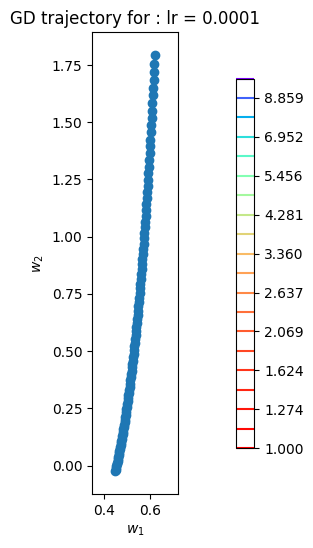

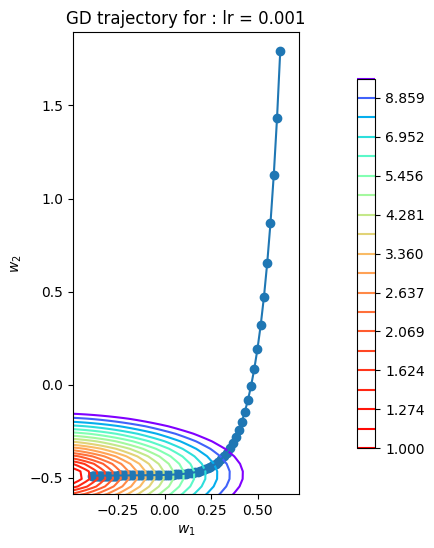

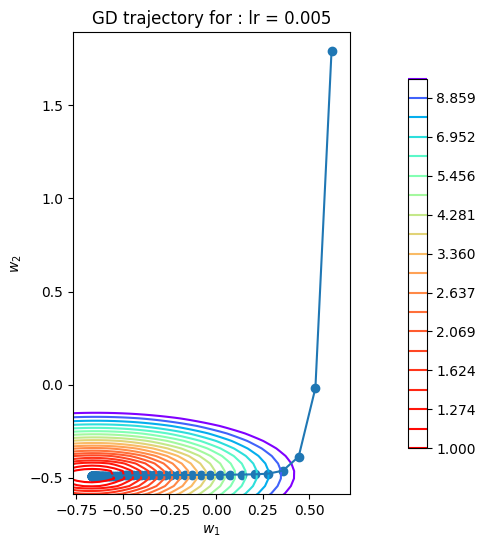

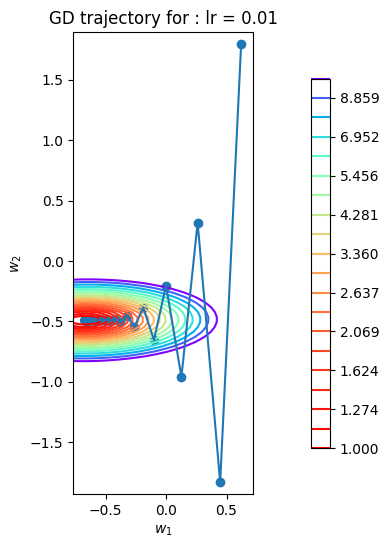

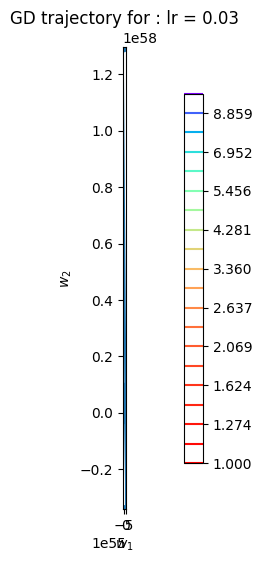

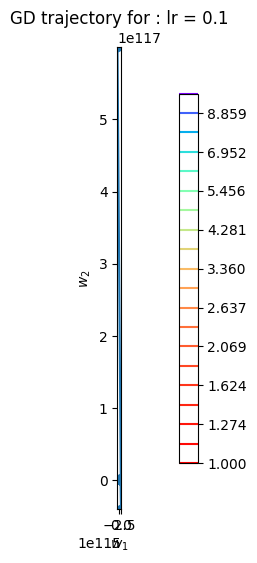

In [9]:
for lr in [1e-4, 1e-3, 5e-3, 1e-2, 3e-2, 1e-1]:
    weights = gradient_descent(w_init, X, y, loss, lr, 100)
    plot_gd(weights, X, y, loss, f"lr = {lr}")

***Выводы:***

Гиперпараметр `lr` влияет на поведение градиентного спуска следующим образом: чем меньше величина шага, тем более плавная линия отображается на графике, т.е градиент "спускается" без резких скачков.

Также необходимо подобрать такой размер шага, чтобы градиент спустился до минимума, а не не дошёл или не перешагнул его.

Для данной выборки оптимальными являются `lr` = 0.001 || 0.005 

Теперь реализуем стохастический градиентный спуск

**Задание 1.4 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent`

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча. 

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [10]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    
    traj = np.zeros((n_iterations + 1, w_init.shape[0]))
    traj[0] = w_init
    
    for step in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        batch = X[batch_indices]
        grad = loss.calc_grad(batch, y[batch_indices], traj[step])
        w_t = traj[step] - lr * grad
        traj[step + 1] = w_t
    
    return traj


**Задание 1.5 (5/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`. 

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

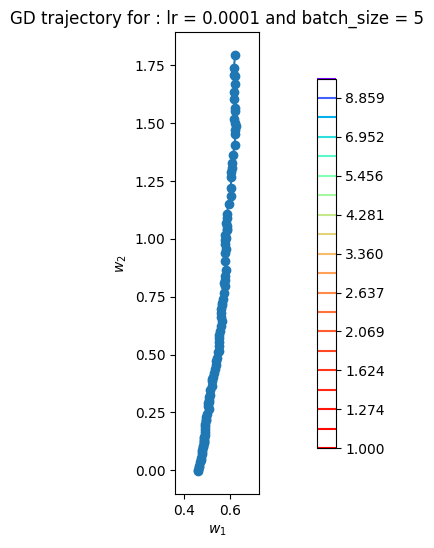

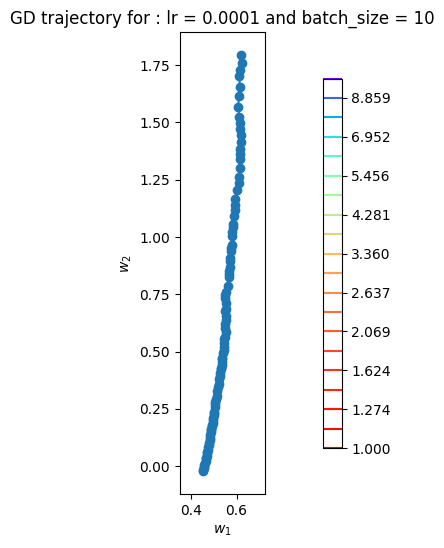

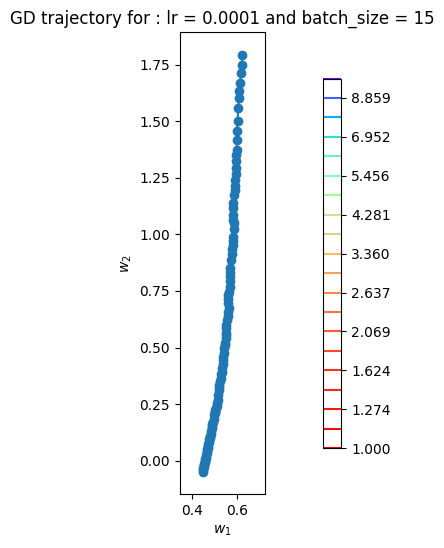

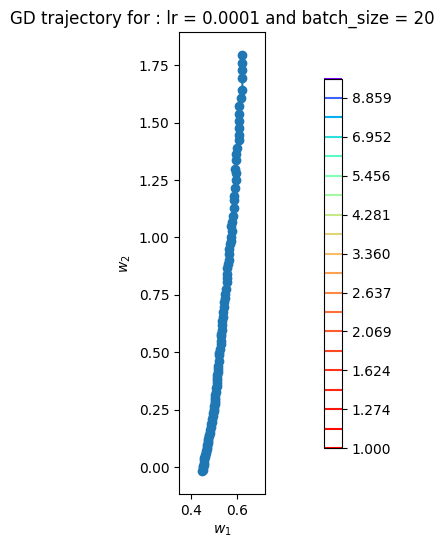

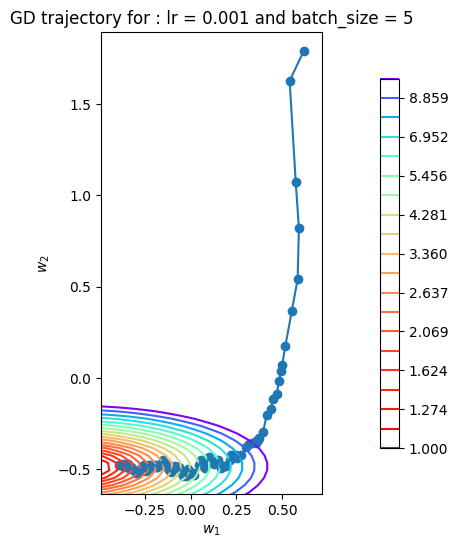

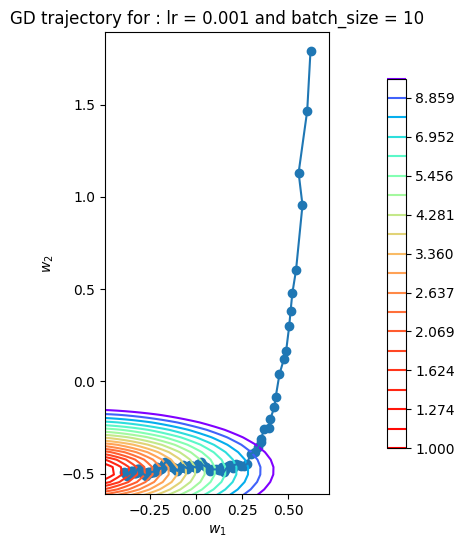

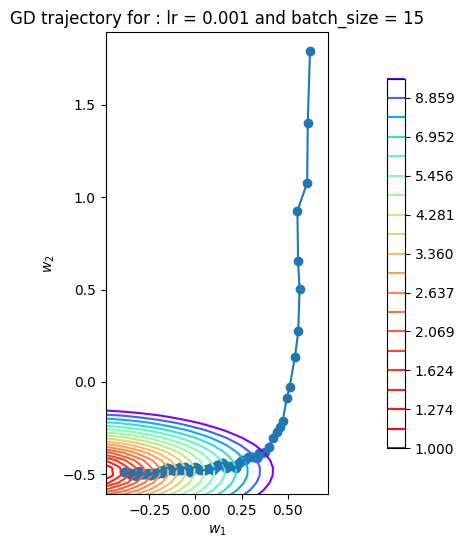

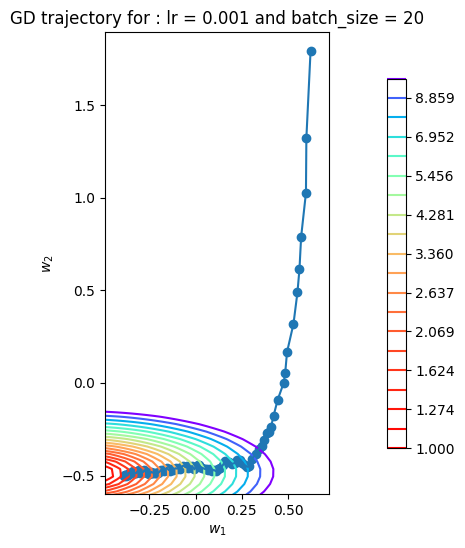

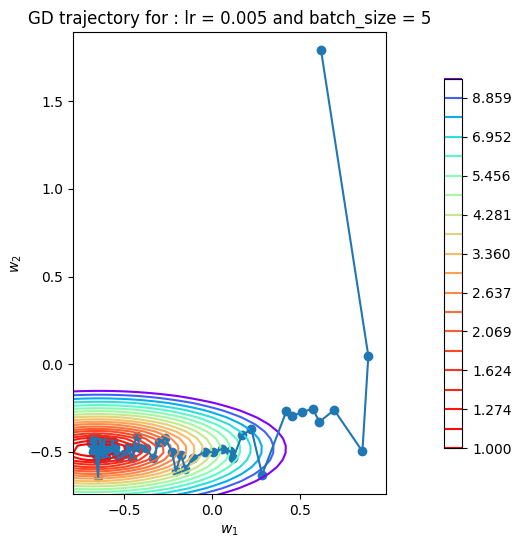

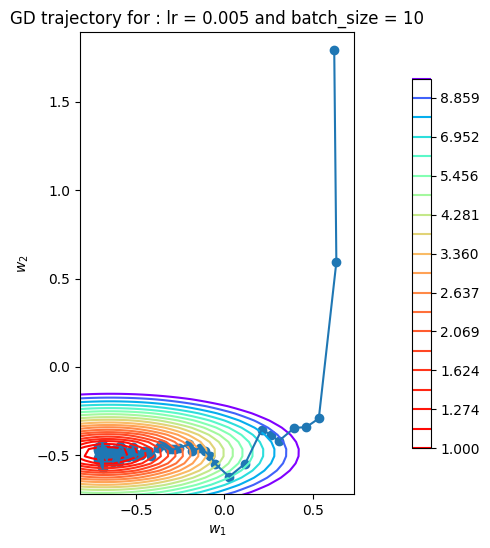

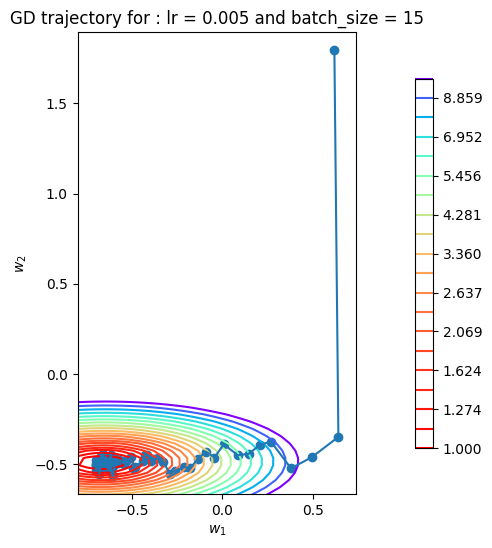

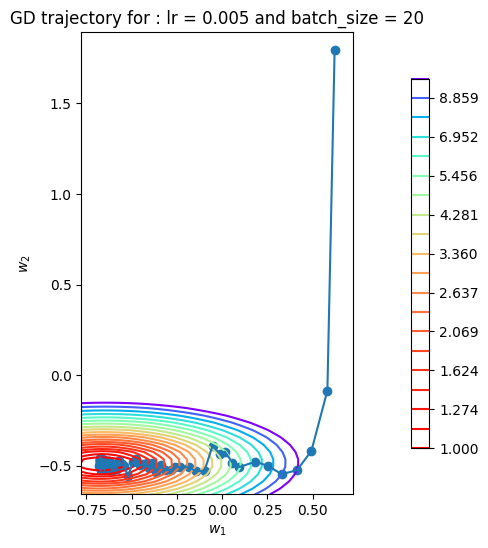

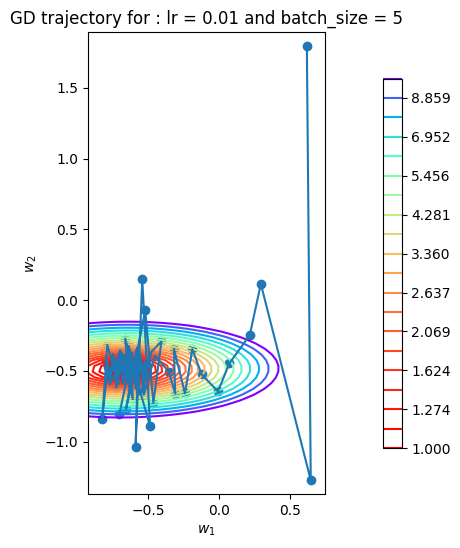

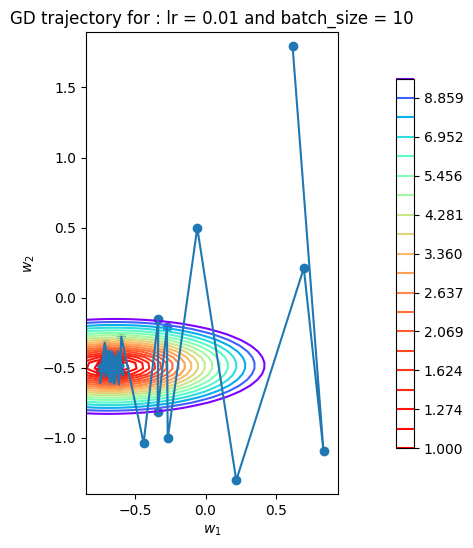

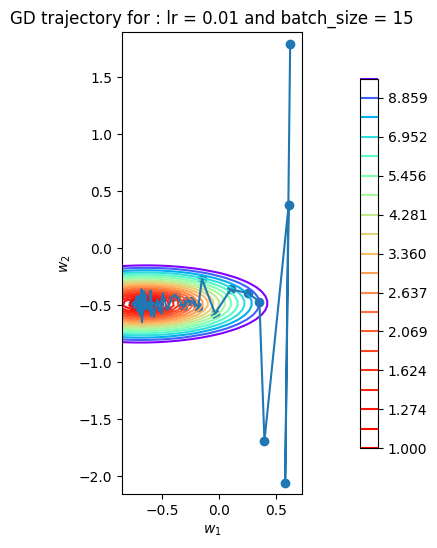

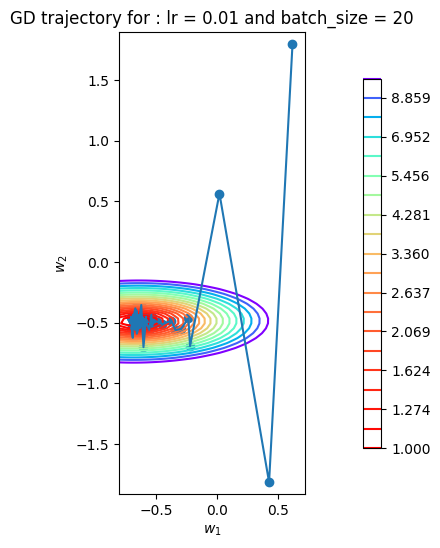

In [11]:
np.random.seed(42)
for lr in [1e-4, 1e-3, 5e-3, 1e-2]:
    for batch_size in [5, 10, 15, 20]:
        weights = stochastic_gradient_descent(w_init, X, y, loss, lr, batch_size, 100)
        plot_gd(weights, X, y, loss, f"lr = {lr} and batch_size = {batch_size}")

***Выводы:***

При слишком маленьких `lr` ***sgd*** не доходит до минимума, а "топчется" на одном месте несколько раз, таким образом можно сказать, что `lr` влияет на плотность линии.

Чем больше `batch_size`, тем длиннее линия траектории (за счёт увеличения кол-ва выборки), из-за этого при малых `lr` ***sgd*** может продвигаться ближе к минимуму.   

Однако если подобрать относительно большой шаг и большой `mini_batch`, то у нас будет большой разброс точек и сильное уплотнение около минимума, причем то, что мы придем строго в минимум, не гарантируется. В качестве такого примера можно рассмотреть несколько последних графиков.


Стохастический градиентный спуск в отличие от обычного градиентного спуска, может не дойти до оптимума. Можно сказать, что чем больше будет размер выборки для ***sgd***, тем более стабильную траектортию он будет иметь. (которая будет приближаться к траектории обычного ***gd***) 

Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага. 

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы более точнее этого минимума достичь и не "перепрыгнуть" его. 

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [12]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    p: float,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    traj = np.zeros((n_iterations + 1, w_init.shape[0]))
    traj[0] = w_init
    
    for step in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        batch = X[batch_indices]
        grad = loss.calc_grad(batch, y[batch_indices], traj[step])
        lr_size = lr * (1 / (1 + step)) ** p
        w_t = traj[step] - lr_size * grad
        traj[step + 1] = w_t
    
    return traj

**Задание 1.7 (5/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска

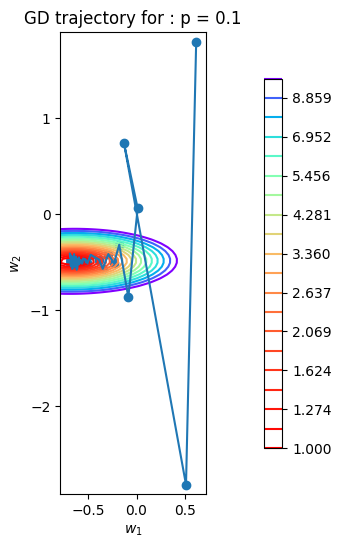

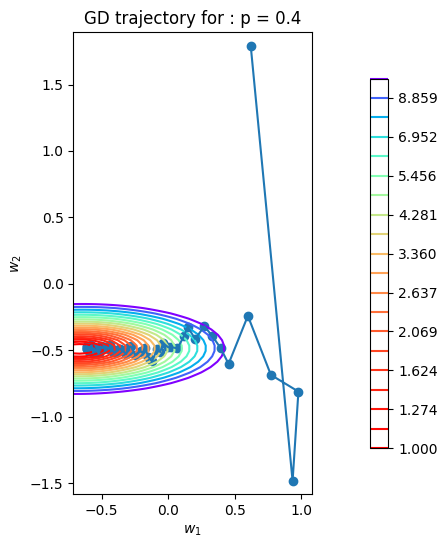

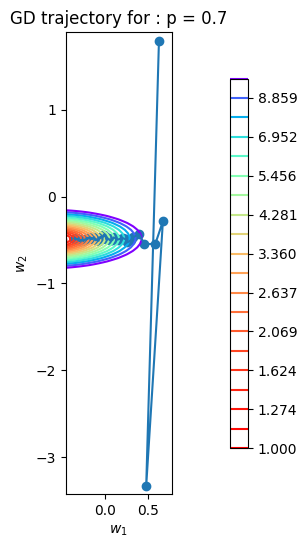

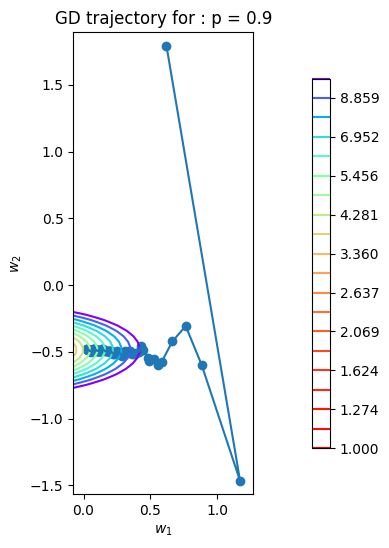

In [13]:
np.random.seed(42)

for p in [0.1, 0.4, 0.7, 0.9]:
    weights = stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, p, 100)
    plot_gd(weights, X, y, loss, f"p = {p}")

***Выводы:***
Гиперпараметр `p` создает наилучшую линию траектории на втором графике `p = 0.4`. На нём четко видно постепенное уменьшение шага и наиболее плавная линия траектории, благодаря чему можно понятно читать график.

На остальных же графиках параметр `p` задаёт вначале большие шаги, а потом - маленькие, из-за чего ***sgd*** может не доходить до оптимума или наоборот - толпиться около него.

Из этого можно сделать вывод, что не всегда наличие `p` обеспечивает оптимальный спуск, и данный параметр необходимо подбирать. 

**Задание 1.8 (5/8 балла):** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

In [14]:
def loss_steps(n_iter: int, X, y, loss, weights: List[np.ndarray]) -> List:
    loss_points = []
    for step in range(n_iter):
        loss_points.append(loss.calc_loss(X, y, weights[step]))
    return loss_points

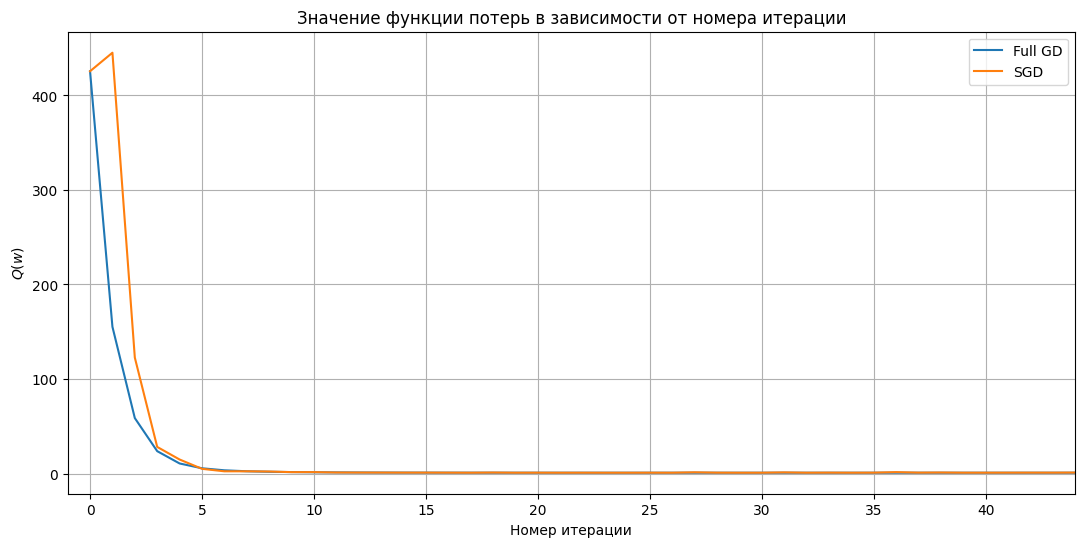

In [15]:
np.random.seed(42)
n_iterations = 1000

weights_gd =  gradient_descent(w_init, X, y, loss, 1e-2, n_iterations)
weights_sgd = stochastic_gradient_descent(w_init, X, y, loss, 1e-2, 10, 0.1, n_iterations)
loss_iter_gd = loss_steps(n_iterations + 1, X, y, loss, weights_gd)
loss_iter_sgd = loss_steps(n_iterations + 1, X, y, loss, weights_sgd)

plt.figure(figsize=(13, 6))
plt.plot(range(n_iterations + 1), loss_iter_gd, label="Full GD")
plt.plot(range(n_iterations + 1), loss_iter_sgd, label="SGD")

plt.title("Значение функции потерь в зависимости от номера итерации")
plt.xlim((-1, num_steps + 1))
plt.legend()
plt.xlabel("Номер итерации")
plt.ylabel("$Q(w)$")
plt.grid()
plt.show()

***Выводы:***

Главное преимущество ***sgd*** в том, что на большой выборке он выполняется в разы быстрее обычного ***gd***.

На данном же рисунке видно, что ***gd*** за меньшее количество итераций приходит к оптимуму, в отличие от ***sgd***. Однако каждая итерация для ***gd*** будет происходить в разы дольше, чем одна итерация для ***sgd***.

В связи с этим можно сказать, что на данном графике мы преимущесто ***sgd*** не видим, а видим лишь только то, что оба градиентых спуска приходят к одному значению ошибки.

## Часть 2. Линейная регрессия (5 баллов)

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`

В методе `predict` мы будем применять нашу регрессию к датасету, 

**Задание 2.1 (5/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [16]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr

    def fit(self, X: np.ndarray, y: np.ndarray) -> "LinearRegression":
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        w_init = np.random.uniform(-1, 1, X.shape[1])
        w = gradient_descent(w_init, X, y, self.loss, self.lr, 1000)[-1]
        self.w = w
        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        self.predictions = np.dot(X, self.w)

        return self.predictions

Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации. 

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [17]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [18]:
import pandas as pd

X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
    header=None,
    na_values=["?"],
)
X_raw.head()
X_raw = X_raw[~X_raw[25].isna()].reset_index()

In [19]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)

**Задание 2.2 (5/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

### **Заполним пропуски**: 

Для вещественных - средним значением, для категориальных - самым популярным значением.

In [20]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [22]:
# переименуем колонки в строковый тип
X_raw.columns = X_raw.columns.to_series().apply(str)

# проверим Nan
nans = X_raw.isna().mean()
nans

index    0.00000
0        0.00000
1        0.18408
2        0.00000
3        0.00000
4        0.00000
5        0.00995
6        0.00000
7        0.00000
8        0.00000
9        0.00000
10       0.00000
11       0.00000
12       0.00000
13       0.00000
14       0.00000
15       0.00000
16       0.00000
17       0.00000
18       0.01990
19       0.01990
20       0.00000
21       0.00995
22       0.00995
23       0.00000
24       0.00000
dtype: float64

In [23]:
# находим столбцы с Nan значениями
nans_ind = nans[nans > 0].index
nans_ind

Index(['1', '5', '18', '19', '21', '22'], dtype='object')

Исследуем на выбросы наши признаки с пропущенными значениями. В случае если будут выбросы, заполним `Nan` медианой, в противном случае - средним значением.  

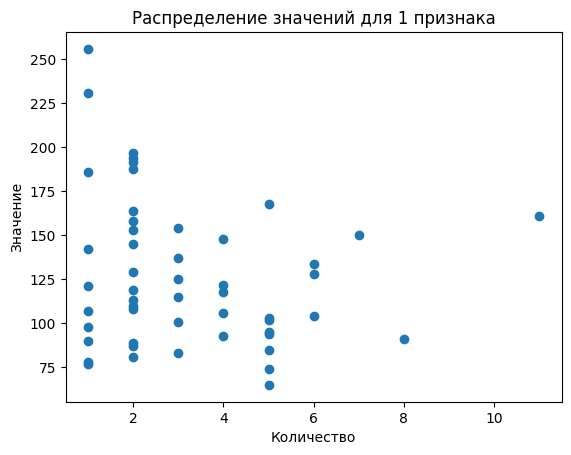

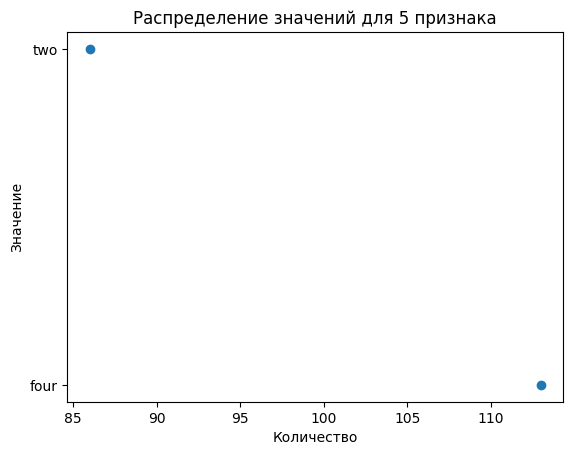

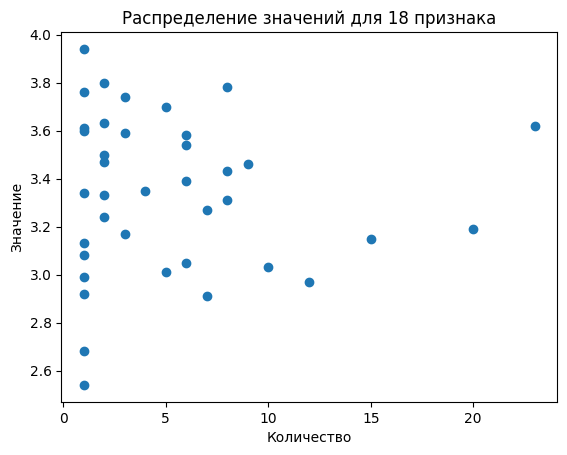

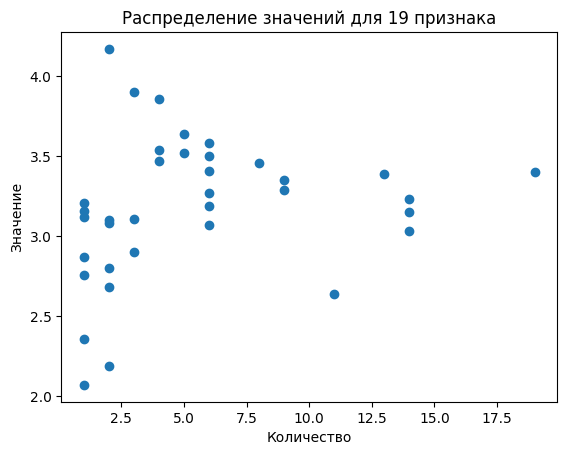

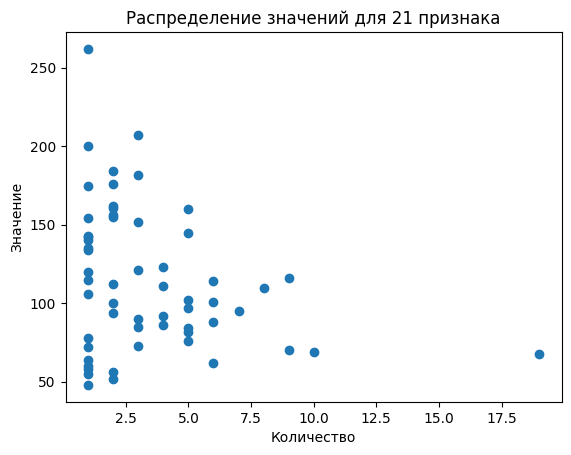

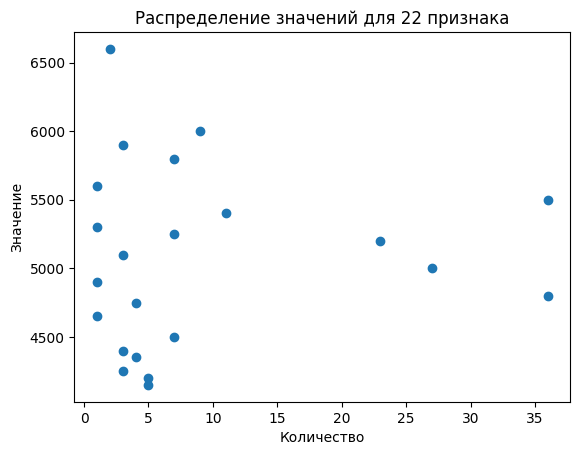

In [24]:
# создадим датафрейм, состоящий из колонок с Nan-ми
df_nan = pd.DataFrame(X_raw, columns=nans_ind)

# построим графики значений в зависимости от их количества 
for column in df_nan.columns:
    plt.title(f'Распределение значений для {column} признака');
    plt.scatter(df_nan[column].value_counts().values, df_nan[column].value_counts().index)
    plt.xlabel("Количество")
    plt.ylabel("Значение")
    plt.show();

Видим, что наибольшее значение не превышает на более чем 25%. Поэтому можно сказать, что явных выбросов нет, следовательно заменяем средним значением.

In [25]:
# создаем маску, указывающую на столбцы с категориальными признаками
cat_features_mask = (X_raw.dtypes == "object").values

# для вещественных признаков заполним пропуски средним значением
replacer = SimpleImputer(strategy="mean")
X_real = X_raw[X_raw.columns[~cat_features_mask]].drop(columns=['index'])
X_real = pd.DataFrame(replacer.fit_transform(X_real), columns=X_real.columns)

# для категориальных признаков заполним пропуски самым частым значением
X_cat = X_raw[X_raw.columns[cat_features_mask]]
X_cat = X_cat.fillna(X_cat.mode().iloc[0])

X_no_mis = pd.concat([X_real, X_cat], axis=1)

### **Закодируем категориальные переменные:**

In [26]:
X_dum = pd.get_dummies(X_no_mis, drop_first=True)

### **Разделим на train и test:**

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_dum, y, random_state=7, test_size=0.3)

### **Отмасштабируем признаки:**

In [28]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

**Задание 2.3 (5/8 балла):** Обучите написанную вами линейную регрессию на обучающей выборке

In [29]:
linear_regression.fit(X_train_norm, y_train);

**Задание 2.4 (5/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [30]:
from sklearn.metrics import mean_squared_error

print(f"MSE for lr = {linear_regression.lr}")
print(f"Train: {mean_squared_error(y_train, linear_regression.predict(X_train_norm))}")
print(f"Test: {mean_squared_error(y_test, linear_regression.predict(X_test_norm))}")

MSE for lr = 0.1
Train: 1.049774439438039e+151
Test: 8.5548481021486e+150


Подберем оптимальный параметр `lr` для нашей линейной регресии `LinearRegression(MSELoss())`.

In [31]:
def valid_lr(X_train: np.ndarray, X_test: np.ndarray, y_train: np.ndarray,
             y_test: np.ndarray, params: List[float]) -> pd.DataFrame:
    
    data = pd.DataFrame(index=params, columns=['Train', 'Test'])
    for lr in params:
        linear_regression = LinearRegression(MSELoss(), lr)
        linear_regression.fit(X_train, y_train)
        data.loc[lr] = [mean_squared_error(y_train, linear_regression.predict(X_train)),
                  mean_squared_error(y_test, linear_regression.predict(X_test))]
    return data


valid_lr(X_train_norm, X_test_norm, y_train, y_test, [1e-5, 1e-4, 1e-3, 0.01, 0.05])

,Train,Test
0.00001,219696024.290608,197588916.613555
0.00010,131113985.026906,116516944.956862
0.00100,7517104.512199,5061690.807358
0.01000,2488925.146248,4577899.326343
0.05000,2120175.393126,5333165.408488


В результате самым оптимальным значением стал `lr = 0.01`. Будем использовать его для следущих моделей с разными функциями ошибок.

In [32]:
linear_regression = LinearRegression(MSELoss(), 0.01)
linear_regression.fit(X_train_norm, y_train);

print(f"MSE for lr = {linear_regression.lr}")
print(f"Train: {mean_squared_error(y_train, linear_regression.predict(X_train_norm))}")
print(f"Test: {mean_squared_error(y_test, linear_regression.predict(X_test_norm))}")

MSE for lr = 0.01
Train: 2488951.483884561
Test: 4577646.832448077


Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5 (5/8 балла):** Реализуйте класс `MSEL2Loss`

Он должен вычислять лосс и градиент по формулам наверху

Подсказка: обратите внимание, что последний элемент вектора `w` — это bias (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем из лекций и семинаров, bias регуляризовать не нужно. Поэтому не забудьте убрать последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулить его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`

In [33]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.0):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        loss = np.mean((np.dot(X, w) - y)**2) + self.coef * np.sum(w[:-1]**2)
        return loss

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        grad = 2 * np.dot(X.T, np.dot(X, w) - y) / y.shape[0] + 2 * self.coef * np.append(w[:-1], 0)
        return grad

Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

In [34]:
linear_regression_l2 = LinearRegression(MSEL2Loss(0.1), 0.01)

**Задание 2.6 (5/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации. 

In [35]:
linear_regression_l2.fit(X_train_norm, y_train);

Подберем коэффициент регуляризации для функции ошибки `MSEL2Loss`.

In [36]:
def valid_loss(X_train: np.ndarray, X_test: np.ndarray, y_train: np.ndarray, y_test:np.ndarray,
               loss: BaseLoss, params: List[float | int]) -> pd.DataFrame:
    
    data = pd.DataFrame(index=params, columns=['MSE_Train', 'MSE_Test'])
    for el in params:
        linear_regression = LinearRegression(loss(el), 0.01)
        linear_regression.fit(X_train, y_train)
        data.loc[el] = [mean_squared_error(y_train, linear_regression.predict(X_train)),
                        mean_squared_error(y_test, linear_regression.predict(X_test))]

    return data

In [37]:
valid_loss(X_train_norm, X_test_norm, y_train, y_test, MSEL2Loss, [1e-5, 1e-4, 1e-3, 0.05, 0.01, 0.1, 0.5, 1, 2])

,MSE_Train,MSE_Test
0.00001,2488959.034956,4577108.254547
0.00010,2489529.433492,4575407.174767
0.00100,2495039.282642,4552853.949433
0.05000,2839127.139479,3770634.427235
0.01000,2552806.345126,4344803.794678
0.10000,3193226.480928,3457300.385832
0.50000,5154498.302192,3385088.936488
1.00000,6918297.535334,4067062.84426
2.00000,9811684.199855,5802921.986996


В результате самым оптимальным значением стал `coef = 0.1`. Будем использовать его для `LinearRegression(MSEL2Loss(coef), 0.01)` модели.

In [38]:
linear_regression_l2 = LinearRegression(MSEL2Loss(0.1), 0.01)
linear_regression_l2.fit(X_train_norm, y_train);

print("MSE:\n")
print(f"Train: {mean_squared_error(y_train, linear_regression.predict(X_train_norm))}")
print(f"Test: {mean_squared_error(y_test, linear_regression.predict(X_test_norm))}")

print(f"\nMSE for gradient by MSEL2Loss, coef = {linear_regression_l2.loss.coef}:\n")
print(f"Train: {mean_squared_error(y_train, linear_regression_l2.predict(X_train_norm))}")
print(f"Test: {mean_squared_error(y_test, linear_regression_l2.predict(X_test_norm))}")

print(f"\nMSEL2Loss for gradient by MSEL2Loss, coef = {linear_regression_l2.loss.coef}:\n")
print(f"Train: {linear_regression_l2.loss.calc_loss(X_train_norm, y_train, linear_regression_l2.w)}")
print(f"Test: {linear_regression_l2.loss.calc_loss(X_test_norm, y_test, linear_regression_l2.w)}")

MSE:

Train: 2488951.483884561
Test: 4577646.832448077

MSE for gradient by MSEL2Loss, coef = 0.1:

Train: 3193220.5517988093
Test: 3457386.948515044

MSEL2Loss for gradient by MSEL2Loss, coef = 0.1:

Train: 4959039.955122852
Test: 5223206.351839086


Видим, что с использованием `MSEL2Loss` ошибка `MSE`, в сравнении с `MSELoss`, на тесте стала значительно меньше, однако ошибка на трейне увеличилась.

В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

**Задание 2.7 (5/8 балла):** Реализуйте класс `HuberLoss`

Он должен вычислять лосс и градиент по формулам наверху

In [39]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps
        
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        errors = np.zeros(X.shape[0])
        z = np.dot(X, w) - y
        eps_mask = (z > - self.eps) & (z < self.eps)
        errors[eps_mask] = 0.5 * z[eps_mask]**2
        errors[~eps_mask] = self.eps * (np.absolute(z[~eps_mask]) - 0.5 * self.eps) 
        loss = np.mean(errors)
        return loss

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        fi = np.zeros(X.shape[0])
        z = np.dot(X, w) - y
        eps_mask = (z > - self.eps) & (z < self.eps)
        fi[eps_mask] = z[eps_mask]
        fi[~eps_mask] = self.eps * np.sign(z[~eps_mask])
        grads = np.sum((X.T * fi).T, 0) * (1 / X.shape[0])

        return grads


**Задание 2.8 (5/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

Подберем параметр `eps` для нашей модели `LinearRegression(HuberLoss(eps), 0.01)`.

In [40]:
valid_loss(X_train_norm, X_test_norm, y_train, y_test, HuberLoss, [1000, 5e+3, 10e+3, 20e+3, 40e+3])

,MSE_Train,MSE_Test
1000.0,45750642.618191,35652182.471514
5000.0,3206143.481979,3607092.157989
10000.0,2915100.920635,4250014.793016
20000.0,2862845.27001,4302385.340466
40000.0,2854908.874522,4312696.3998


В результате самым оптимальным значением стал `eps = 5000`. Будем использовать его для `LinearRegression(HuberLoss(eps), 0.01)` модели.

In [41]:
linear_regression_huber = LinearRegression(HuberLoss(5000), 0.01)
linear_regression_huber.fit(X_train_norm, y_train);

Выведем значения всех получившихся ошибок:

In [42]:
print("MSE:\n")
print(f"Train: {mean_squared_error(y_train, linear_regression.predict(X_train_norm))}")
print(f"Test: {mean_squared_error(y_test, linear_regression.predict(X_test_norm))}")

print(f"\nMSE for gradient by MSEL2Loss, coef = {linear_regression_l2.loss.coef}:\n")
print(f"Train: {mean_squared_error(y_train, linear_regression_l2.predict(X_train_norm))}")
print(f"Test: {mean_squared_error(y_test, linear_regression_l2.predict(X_test_norm))}")

print(f"\nMSEL2Loss for gradient by MSEL2Loss, coef = {linear_regression_l2.loss.coef}:\n")
print(f"Train: {linear_regression_l2.loss.calc_loss(X_train_norm, y_train, linear_regression_l2.w)}")
print(f"Test: {linear_regression_l2.loss.calc_loss(X_test_norm, y_test, linear_regression_l2.w)}")

print(f"\nMSE for gradient by Huber loss, eps = {linear_regression_huber.loss.eps} \n")
print(f"Train: {mean_squared_error(y_train, linear_regression_huber.predict(X_train_norm))}")
print(f"Test: {mean_squared_error(y_test, linear_regression_huber.predict(X_test_norm))}")

print(f"\nHuberLoss for gradient by Huber loss, eps = {linear_regression_huber.loss.eps} \n")
print(f"Train: {linear_regression_huber.loss.calc_loss(X_train_norm, y_train, linear_regression_huber.w)}")
print(f"Test: {linear_regression_huber.loss.calc_loss(X_test_norm, y_test, linear_regression_huber.w)}")

MSE:

Train: 2488951.483884561
Test: 4577646.832448077

MSE for gradient by MSEL2Loss, coef = 0.1:

Train: 3193220.5517988093
Test: 3457386.948515044

MSEL2Loss for gradient by MSEL2Loss, coef = 0.1:

Train: 4959039.955122852
Test: 5223206.351839086

MSE for gradient by Huber loss, eps = 5000 

Train: 3206334.2091152566
Test: 3606942.3187673595

HuberLoss for gradient by Huber loss, eps = 5000 

Train: 1499451.2694575945
Test: 1761223.3192698709


Видим, что `MSE` для регрессии с `Huber loss` в сравнении с `MSELoss` на тесте уменьшилась, а на трейне увеличилась, однако не так сильно как при `MSEL2Loss`.

**Задание 3 (0.08/8 балла)**
Вставьте ваш любимый мем 2021 в ячейку ниже:

![mem](https://sun1-21.userapi.com/impg/0DOk7DQMMiY2Slo8OPM_SPlc2Tq-gGvSAPmErw/j2_moT4B_58.jpg?size=906x1072&quality=95&sign=9ab3039167056a8e626f2034ae512650&type=album)

### БОНУС (2.5 баллов)

Градиентный спуск — далеко не единственный метод оптимизации. 
Другой очень известный метод называется ["Алгоритм имитации отжига"](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0). Он не так часто используется для оптимизации моделей машинного обучения, но у вас есть уникальная возможность попробовать применить его к нашей любимой линейной регрессии.

**Задание (2.5 баллов)**:
Напишите алгоритм имитации отжига для оптимизации MSE линейной регрессии. 

Сравните результат с градиентным спуском по "траектории" и по финальному лоссу.

Подсказка: каждую новую точку (веса регресси в нашем случае) можно семплировать из некоторого случайного распределением с центром в текущей точке. Хорошо подойдут распределения с "тяжёлыми" хвостами, например, распределение Стьюдента с параметром количества степеней свободы в районе 3.
Это может выглядеть, например, так:
```
new_w = old_w + np.random.standard_t(3, size=old_w.shape)
```
С параметром распределения можно поэксперементировать: чем он больше, тем реже новые точки будут очень сильно уходить от старых.

### Создадим функцию, реализующую алгоритм отжига

In [43]:
def simulated_annealing(    
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    t_init: float,
    alpha: float,
    n_iterations: int = 100000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param t_init: float -- Начальная "температура"
    :param alpha: float -- параметр величины, на который нужно домножать "температуру" для её уменьшения
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    traj = np.zeros((n_iterations + 1, w_init.shape[0]))
    t = np.zeros((n_iterations + 1))
    traj[0] = w_init
    t[0] = t_init
    
    for step in range(n_iterations):
        xi = np.random.standard_t(4, size=w_init.shape[0])
        x_t = traj[step] +  xi * np.abs(xi)
        delta = mean_squared_error(y, np.dot(X, x_t)) - mean_squared_error(y, np.dot(X, traj[step]))
        if delta < 0:
            traj[step + 1] = x_t
        else:
            eta = np.random.uniform(0, 1)
            traj[step + 1] = delta if eta < np.exp(- delta / t[step]) else traj[step]
        t[step + 1] = alpha * t[step]

    return traj

### Создадим класс модели, которая осуществляет отжиг

In [45]:
class SimulatedAnnealing:
    def __init__(self, t_init: float = 5, alpha: float = 0.95, n_iterations: int = 100) -> None:
        """
        :param t_init: float -- Начальная "температура"
        :param alpha: float -- параметр величины, на который нужно домножать "температуру" для её уменьшения
        :param n_iterations: int -- сколько итераций делать
        """
        self.t_init = t_init
        self.alpha = alpha
        self.n_iterations = n_iterations
        
    def fit(self, X: np.ndarray, y: np.ndarray) -> "Simulated Annealing":
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        w_init = np.random.uniform(-1, 1, X.shape[1])
        w = simulated_annealing(w_init, X, y, self.t_init, self.alpha, self.n_iterations)[-1]
        self.w = w
        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что отжиг обучен, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Simulated Annealing must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        self.predictions = np.dot(X, self.w)

        return self.predictions

### Выведем графики на выборке с двумя признаками

In [46]:
np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

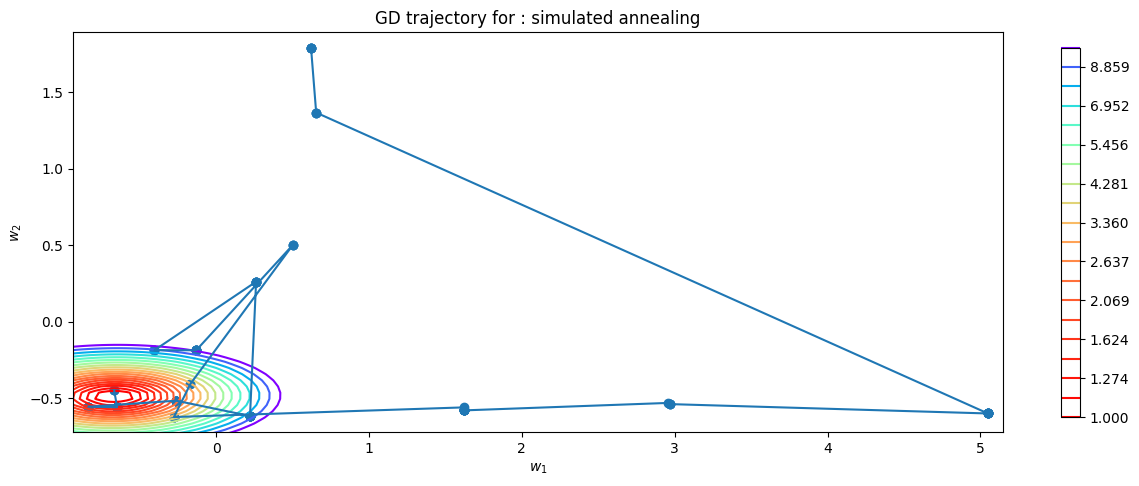

In [47]:
np.random.seed(1337)
w_sim_ann = simulated_annealing(w_init, X, y, 5, 0.95, 100)

plot_gd(w_sim_ann, X, y, loss, "simulated annealing")

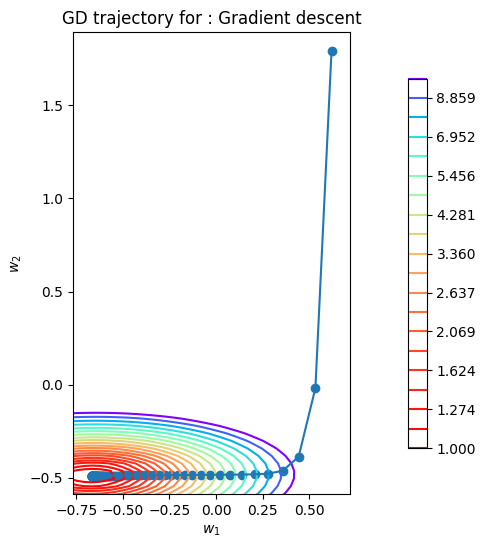

In [48]:
loss = MSELoss()
w_grad = gradient_descent(w_init, X, y, loss, 0.005, 100)

plot_gd(w_grad, X, y, loss, "Gradient descent")

### Сравним MSE на выборке `X` с двумя признаками:

In [50]:
np.random.seed(1337)
sim_anneal = SimulatedAnnealing(5, 0.95, 1000)
sim_anneal.fit(X, y);
print(f"MSE gradient descent: {mean_squared_error(y, np.dot(X, w_grad[-1]))}")
print(f"MSE имитацией отжига: {mean_squared_error(y, sim_anneal.predict(X))}")

MSE gradient descent: 0.867065898627165
MSE имитацией отжига: 0.876274168659722


### Сравним ошибки на всех ошибках, включая имитацию отжига

In [51]:
np.random.seed(1337)

print("MSE:\n")
print(f"Train: {mean_squared_error(y_train, linear_regression.predict(X_train_norm))}")
print(f"Test: {mean_squared_error(y_test, linear_regression.predict(X_test_norm))}")

print(f"\nMSE for gradient by MSEL2Loss, coef = {linear_regression_l2.loss.coef}:\n")
print(f"Train: {mean_squared_error(y_train, linear_regression_l2.predict(X_train_norm))}")
print(f"Test: {mean_squared_error(y_test, linear_regression_l2.predict(X_test_norm))}")

print(f"\nMSEL2Loss for gradient by MSEL2Loss, coef = {linear_regression_l2.loss.coef}:\n")
print(f"Train: {linear_regression_l2.loss.calc_loss(X_train_norm, y_train, linear_regression_l2.w)}")
print(f"Test: {linear_regression_l2.loss.calc_loss(X_test_norm, y_test, linear_regression_l2.w)}")

print(f"\nMSE for gradient by Huber loss, eps = {linear_regression_huber.loss.eps} \n")
print(f"Train: {mean_squared_error(y_train, linear_regression_huber.predict(X_train_norm))}")
print(f"Test: {mean_squared_error(y_test, linear_regression_huber.predict(X_test_norm))}")

print(f"\nHuberLoss for gradient by Huber loss, eps = {linear_regression_huber.loss.eps} \n")
print(f"Train: {linear_regression_huber.loss.calc_loss(X_train_norm, y_train, linear_regression_huber.w)}")
print(f"Test: {linear_regression_huber.loss.calc_loss(X_test_norm, y_test, linear_regression_huber.w)}")


sim_anneal = SimulatedAnnealing(100, 0.98, 20000)
sim_anneal.fit(X_train_norm, y_train);

print(f"\nMSE имитацией отжига \n")
print(f"Train: {mean_squared_error(y_train, sim_anneal.predict(X_train_norm))}")
print(f"Test: {mean_squared_error(y_test, sim_anneal.predict(X_test_norm))}")

MSE:

Train: 2488951.483884561
Test: 4577646.832448077

MSE for gradient by MSEL2Loss, coef = 0.1:

Train: 3193220.5517988093
Test: 3457386.948515044

MSEL2Loss for gradient by MSEL2Loss, coef = 0.1:

Train: 4959039.955122852
Test: 5223206.351839086

MSE for gradient by Huber loss, eps = 5000 

Train: 3206334.2091152566
Test: 3606942.3187673595

HuberLoss for gradient by Huber loss, eps = 5000 

Train: 1499451.2694575945
Test: 1761223.3192698709

MSE имитацией отжига 

Train: 2173691.6238588104
Test: 5128193.30932189


***Вывод:*** 

В результате получаем, что при реализации алгоритма имитации отжига `MSE` показывает максимальную ошибку на тесте среди всех ранее опробованных методов.